# Classification Exercises

In [1]:
import pandas as pd
import numpy as np
import os
import acquire
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# visualize
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

# acquire
from env import host, user, password
from pydataset import data

# Data Acquisition

## 1. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

In [2]:
df_iris = data('iris')

- print the first 3 rows

In [3]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


- print the number of rows and columns (shape)

In [4]:
df_iris.shape

(150, 5)

- print the column names

In [5]:
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

- print the data type of each column

In [6]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [7]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#Another option is to use transpose as another way to view the data 
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## 2. Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

In [9]:
df_excel = pd.read_excel('Spreadsheets_Exercises.xlsx', sheet_name='Table1_CustDetails')

- assign the first 100 rows to a new dataframe, df_excel_sample

In [10]:
df_excel_sample = df_excel[:100]

- print the number of rows of your original dataframe

In [11]:
print(f'The original dataframe has {len(df_excel.index)} rows')

The original dataframe has 7049 rows


- print the first 5 column names

In [12]:
df_excel.columns[0:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

- print the column names that have a data type of object

In [13]:
df_excel.select_dtypes(include='object').columns.to_list()

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

- compute the range for each of the numeric variables.

In [14]:
telco_numeric_columns = df_excel.select_dtypes(include=[np.number])
df_column_range = telco_numeric_columns.max() - telco_numeric_columns.min()
df_column_range

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

## 3. Read the data from this google sheet into a dataframe, df_google

In [15]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
    

In [16]:
df_google = pd.read_csv(csv_export_url)

- print the first 3 rows

In [17]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- print the number of rows and columns

In [18]:
df_google.shape

(891, 12)

- print the column names

In [19]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- print the data type of each column

In [20]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- print the summary statistics for each of the numeric variables

In [21]:
df_google_numeric = df_google.select_dtypes(include=[np.number])

In [22]:
df_google_numeric.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


- print the unique values for each of your categorical variables

In [23]:
# I found two solutions with pros and cons each. Using a for loop returns all the unique values, but with no column labels:
for col in df_google:
    if df_google[col].dtypes == 'object':
        print(df_google[col].unique())

['Braund, Mr. Owen Harris'
 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Heikkinen, Miss. Laina' 'Futrelle, Mrs. Jacques Heath (Lily May Peel)'
 'Allen, Mr. William Henry' 'Moran, Mr. James' 'McCarthy, Mr. Timothy J'
 'Palsson, Master. Gosta Leonard'
 'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)'
 'Nasser, Mrs. Nicholas (Adele Achem)' 'Sandstrom, Miss. Marguerite Rut'
 'Bonnell, Miss. Elizabeth' 'Saundercock, Mr. William Henry'
 'Andersson, Mr. Anders Johan' 'Vestrom, Miss. Hulda Amanda Adolfina'
 'Hewlett, Mrs. (Mary D Kingcome) ' 'Rice, Master. Eugene'
 'Williams, Mr. Charles Eugene'
 'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)'
 'Masselmani, Mrs. Fatima' 'Fynney, Mr. Joseph J' 'Beesley, Mr. Lawrence'
 'McGowan, Miss. Anna "Annie"' 'Sloper, Mr. William Thompson'
 'Palsson, Miss. Torborg Danira'
 'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)'
 'Emir, Mr. Farred Chehab' 'Fortune, Mr. Charles Alexander'
 'O\'Dwyer, Miss. Ellen "Nellie"' 'Todoro

In [24]:
#The second solution using lambda, returns unique values with colmun labels...It is easier to read, 
#but you can't visualize all the unique values at once when there is a large amount of unique values 
print(df_google.apply(lambda col: col.unique()))

PassengerId    [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24...
Survived                                                                                          [0, 1]
Pclass                                                                                         [3, 1, 2]
Name           [Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer), Heikkin...
Sex                                                                                       [male, female]
Age            [22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 55.0, 31.0...
SibSp                                                                              [1, 0, 3, 4, 2, 5, 8]
Parch                                                                              [0, 1, 2, 5, 3, 4, 6]
Ticket         [A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 349909, 347742,...
Fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.458

## Data Preparation

### Using the Iris Data:

#### 1. Use the function defined in acquire.py to load the iris data.

In [6]:
df = acquire.get_iris_data()

In [7]:
df.head()

,Unnamed: 0,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id.1,species_name
0,0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,1,1,5.1,3.5,1.4,0.2,1,2,versicolor
2,2,1,5.1,3.5,1.4,0.2,1,3,virginica
3,3,2,4.9,3.0,1.4,0.2,1,1,setosa
4,4,2,4.9,3.0,1.4,0.2,1,2,versicolor


#### 2. Drop the species_id and measurement_id columns.

In [8]:
dropcols = ['species_id', 'measurement_id']

In [9]:
df.drop(columns=dropcols, inplace=True)

#### 3. Rename the species_name column to just species.

In [10]:
df.rename(columns={'species_name': 'species'}, inplace=True)

#### 4. Create dummy variables of the species name.

In [11]:
dummies = pd.get_dummies(df[['species']])

In [12]:
df = pd.concat([df, dummies], axis=1)

In [13]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species_id.1,species,species_setosa,species_versicolor,species_virginica
0,0,5.1,3.5,1.4,0.2,1,setosa,1,0,0
1,1,5.1,3.5,1.4,0.2,2,versicolor,0,1,0
2,2,5.1,3.5,1.4,0.2,3,virginica,0,0,1
3,3,4.9,3.0,1.4,0.2,1,setosa,1,0,0
4,4,4.9,3.0,1.4,0.2,2,versicolor,0,1,0


#### 5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [14]:
def clean_iris(df):
    '''
    clean_iris takes in the iris data set and prepares it for analysis by:
    dropping columns: measurement_id, species_id
    renaming columns: species_name == species
    encoding columns: species
    '''
    dropcols = ['species_id', 'measurement_id', 'Unnamed: 0', 'species_id.1']
    df.drop(columns=dropcols, inplace=True)
    df.rename(columns={'species_name': 'species'}, inplace=True)
    dummies = pd.get_dummies(df[['species']])
    return pd.concat([df, dummies], axis=1)

In [15]:
def prep_iris(df):
    '''
    prep_iris takes in the iris data set and prepares it for analysis by:
    dropping columns: measurement_id, species_id
    renaming columns: species_name == species
    encoding columns: species
    
    performs a train, validate, and test split 
    return three pandas dataframes for train, validate, split
    '''
    df = clean_iris(df)
    train_validate, test = train_test_split(df, test_size=0.2, random_state=1776, stratify=df.species)
    train, validate = train_test_split(train_validate, train_size=0.7, random_state=1776, stratify=train_validate.species)
    return train, validate, test


## Exploratory Analysis Exercises

#### 1. Use the iris dataset. As always, add, commit, and push your changes. Split your data into train, validate, and test samples.

In [17]:
from acquire import get_connection
from prepare import split
import env

In [18]:
def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

query = "SELECT measurements.measurement_id, measurements.sepal_length,\
                measurements.sepal_width, measurements.petal_length, \
                measurements.petal_width, species.species_name, species.species_id \
            FROM measurements JOIN species ON(species.species_id=measurements.species_id)"

def get_data():
    return pd.read_sql(query,get_connection('iris_db'))

df = get_data()

def prep_data(df):
    df['species'] = df['species_name']
    iris_df = df.drop(columns=['measurement_id', 'species_id', 'species_name'])
    return iris_df
    
iris_df = prep_data(df)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
df = iris_df

In [20]:
df.shape

(150, 5)

In [21]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df['species'])
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate['species'])

In [22]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
79,5.7,2.6,3.5,1.0,versicolor
36,5.5,3.5,1.3,0.2,setosa
133,6.3,2.8,5.1,1.5,virginica
95,5.7,3.0,4.2,1.2,versicolor
18,5.7,3.8,1.7,0.3,setosa


In [23]:
train.shape

(84, 5)

In [24]:
iris_melt = train.melt(id_vars=['species'])

In [25]:
iris_melt

,species,variable,value
0,versicolor,sepal_length,5.7
1,setosa,sepal_length,5.5
2,virginica,sepal_length,6.3
3,versicolor,sepal_length,5.7
4,setosa,sepal_length,5.7
...,...,...,...
331,setosa,petal_width,0.2
332,versicolor,petal_width,1.6
333,versicolor,petal_width,1.3
334,setosa,petal_width,0.4


#### 2. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

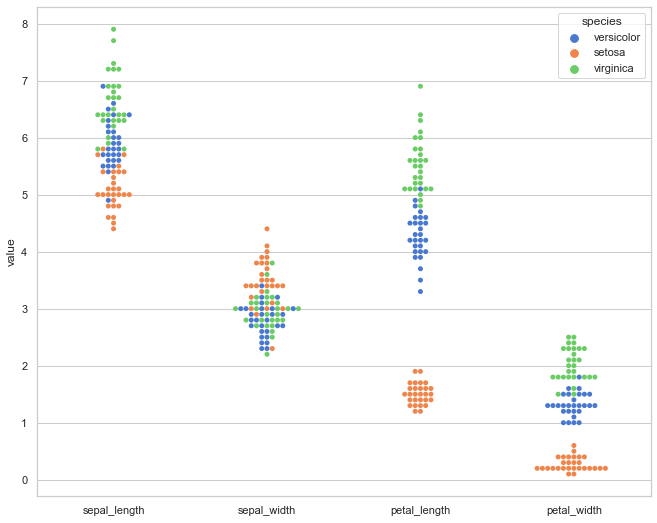

In [26]:
sns.set(style="whitegrid", palette="muted")

#plt.figure(figsize=(16,10))
p = sns.swarmplot(
    x="variable",
    y="value",
    hue="species",
    data=iris_melt,
)

#setting to logscale to account for exponential curve
p.set(xlabel='')
plt.show()

##### Takeaways: 
- This type of chart is difficult to ascertain differences for the measures between species.
- Sepal length tends to be greater than petal length.
- Sepal width is almost always greater than petal width.

#### 3. Create 4 subplots (2 rows x 2 columns) of scatterplots.

- sepal_length x sepal_width
- petal_length x petal_width
- sepal_area x petal_area
- sepal_length x petal_length

In [27]:
train['sepal_area'] = train['sepal_width'] * train['sepal_length']
train['petal_area'] = train['petal_width'] * train['petal_length']

In [28]:
def scatter_by_species(x, y):
    for species, subset in train.groupby('species'):
        plt.scatter(subset[x], subset[y], label=species)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.legend()

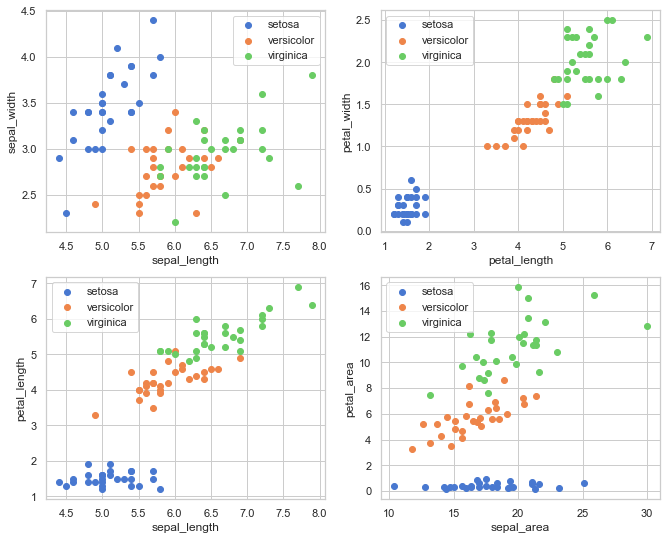

In [29]:
plt.subplot(2,2,1)
scatter_by_species('sepal_length','sepal_width')
plt.subplot(2,2,2)
scatter_by_species('petal_length','petal_width')
plt.subplot(2,2,3)
scatter_by_species('sepal_length','petal_length')
plt.subplot(2,2,4)
scatter_by_species('sepal_area','petal_area')

In [30]:
#features = ['setosa', 'vesicolor', 'virginica']
#feature_length = iris_tidy.measurement.mean()
##survival_rate = train.survived.mean()
#_, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 6), sharey=True)
#for i, feature in enumerate(features):
#    sns.scatterplot(feature, 'measurement', data=iris_tidy, ax=ax[i], alpha=.8) #alpha here is for saturation of the color
#    ax[i].set_xlabel(' ')
#    ax[i].set_ylabel('feature_length')
#    ax[i].set_title(feature)

##### What are your takeaways?

#### 4. Create a heatmap of each variable layering correlation coefficient on top.

In [31]:
correlation = train.corr()

In [32]:
correlation

,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
sepal_length,1.000000,-0.154904,0.867976,0.824691,0.619853,0.860498
sepal_width,-0.154904,1.000000,-0.476228,-0.403306,0.673554,-0.341702
petal_length,0.867976,-0.476228,1.000000,0.957345,0.271618,0.953510
petal_width,0.824691,-0.403306,0.957345,1.000000,0.299920,0.982404
sepal_area,0.619853,0.673554,0.271618,0.299920,1.000000,0.373870
petal_area,0.860498,-0.341702,0.953510,0.982404,0.373870,1.000000


<AxesSubplot:>

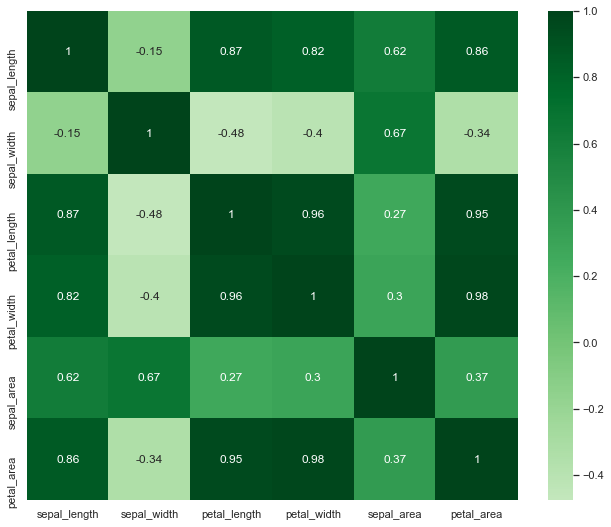

In [33]:
sns.heatmap(correlation, cmap='Greens', center=0, annot=True)

#### 5. Create a scatter matrix visualizing the interaction of each variable.

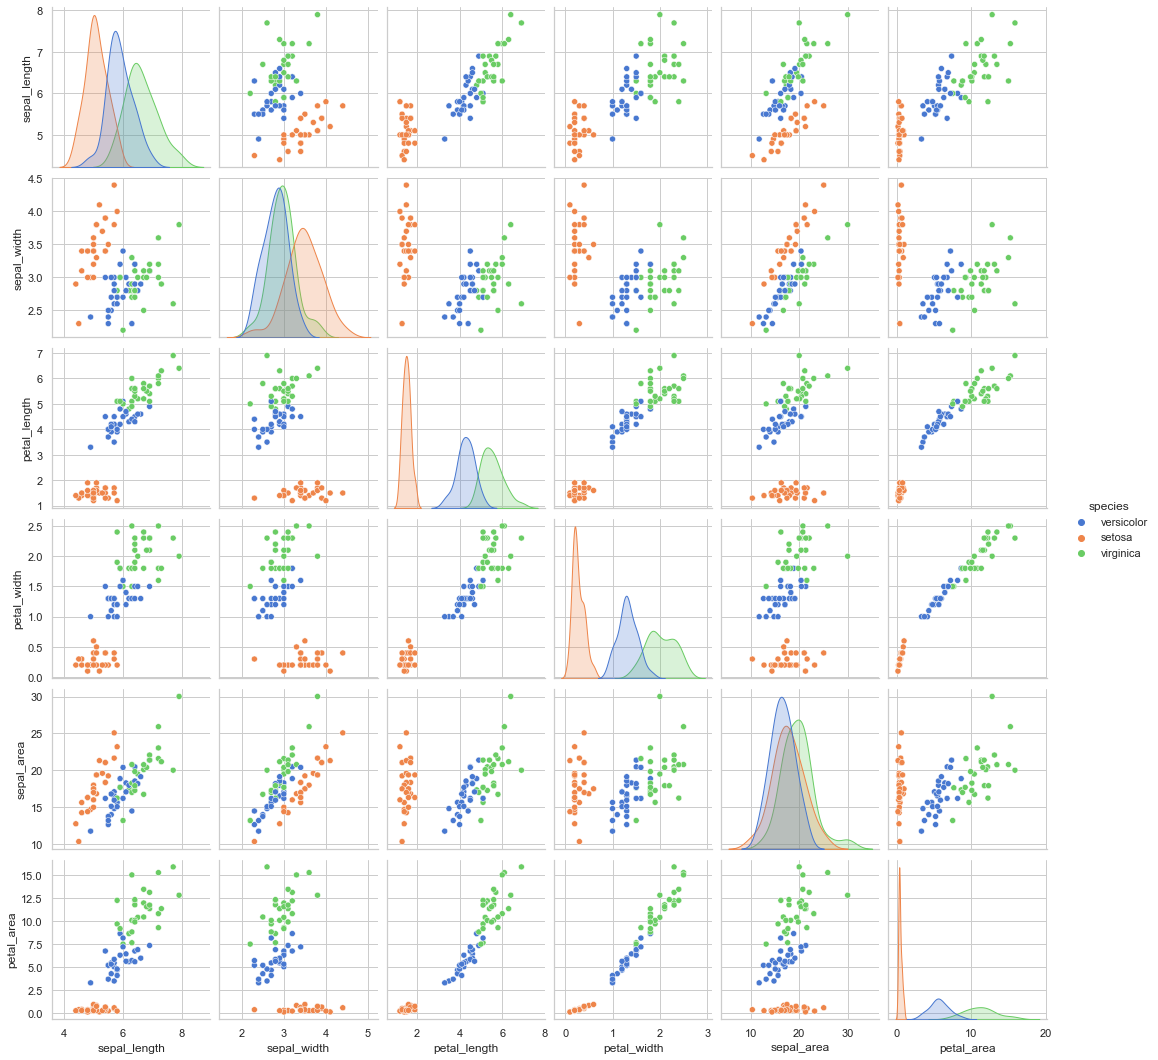

In [34]:
sns.pairplot(train, hue='species')

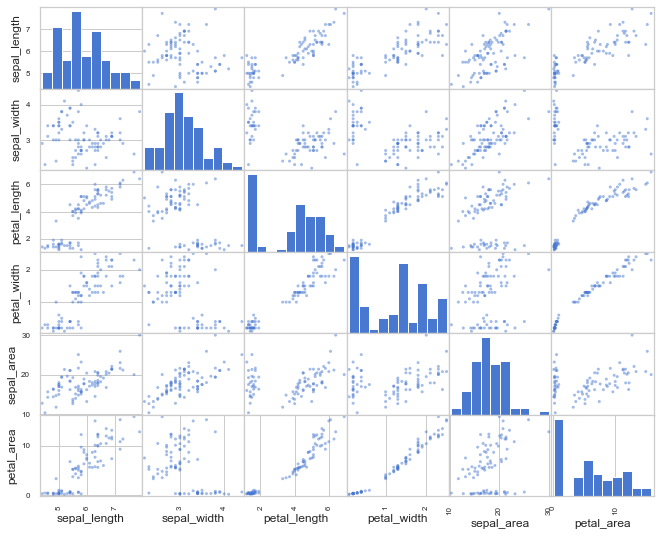

In [35]:
pd.plotting.scatter_matrix(train)
plt.show()

#### 6. Is the sepal length significantly different in virginica compared to versicolor? Run a statistical experiment to test this.

- Make sure to include a null hypothesis, alternative hypothesis, results, and summary.

- What is your takeaway from this statistical testing?

In [36]:
from math import sqrt
from scipy import stats

In [37]:
null_hypothesis = 'There is no difference in sepal length between the iris species virginca and versicolor'
alt_hypothesis = 'There is a difference in sepal length between the iris species virginica and versicolor'
confidence_int = .95
alpha = 1 - confidence_int

In [38]:
virginica_sl = train.sepal_length[train.species == 'virginica']
versicolor_sl = train.sepal_length[train.species == 'versicolor']

In [39]:
t, p = stats.ttest_ind(virginica_sl, versicolor_sl)

In [40]:
if p < alpha: 
    print(f"Reject the null hypothesis that states: {null_hypothesis}")
    print("Move forward with the understanding that there IS a difference in sepal length between these species of iris")
else:
    print("Fail to reject the null hypothesis.")
    print("Not enough evidence to support a significant difference in sepal length.")

Reject the null hypothesis that states: There is no difference in sepal length between the iris species virginca and versicolor
Move forward with the understanding that there IS a difference in sepal length between these species of iris


#### 7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.